In [26]:
import io
import os
import open3d as o3d
import numpy as np
import numpy.linalg as LA
import copy
from matplotlib import pyplot as plt

In [13]:
path = 'pc_to_wc'
point_cloud_path = os.listdir(path)
pc_files = sorted([int(p.split('.')[0]) for p in point_cloud_path])
point_clouds = ([os.path.join(path, f'{p}.pcd') for p in pc_files])

In [16]:
max_x = -np.inf
max_y = -np.inf
max_z = -np.inf

min_x = np.inf
min_y = np.inf
min_z = np.inf
for pc in point_clouds:
    pcd = o3d.io.read_point_cloud(pc)
    pc_points = np.asarray(pcd.points)
    
    max_x_pc = np.max(pc_points[:,0])
    max_y_pc = np.max(pc_points[:,1])
    max_z_pc = np.max(pc_points[:,2])

    min_x_pc = np.min(pc_points[:,0])
    min_y_pc = np.min(pc_points[:,1])
    min_z_pc = np.min(pc_points[:,2])
    
    if max_x_pc > max_x:
        max_x = max_x_pc
    if max_y_pc > max_y:
        max_y = max_y_pc
    if max_z_pc > max_z:
        max_z = max_z_pc
        
    if min_x_pc < min_x:
        min_x = min_x_pc
    if min_y_pc < min_y:
        min_y = min_y_pc
    if min_z_pc < min_z:
        min_z = min_z_pc 

In [17]:
(min_x, max_x), (min_y, max_y), (min_z, max_z)

((-4.8300933837890625, 4.301366329193115),
 (-1.8100624084472656, 1.7768428325653076),
 (-7.266272068023682, 4.595304012298584))

In [21]:
x_range = int((max_x - min_x) / 0.3)
y_range = int((max_y - min_y) / 0.3)
z_range = int((max_z - min_z) / 0.3)

In [22]:
(x_range, y_range, z_range)

(30, 11, 39)

In [73]:
occupancy_grid = np.ones((x_range, z_range))
l = []
l1 = []
for pc in point_clouds[:12]:
    pcd = o3d.io.read_point_cloud(pc)
    pc_points = np.asarray(pcd.points)
    
    l1.append(pcd)
    for point in pc_points:
        x = int((point[0] - min_x) / 0.3)
        y = int((point[1] - min_y) / 0.3)
        z = int((point[2] - min_z) / 0.3)
        
        if y <3:
            l.append(point)
        if occupancy_grid[x,z] == 1:
            if y > 9:
                occupancy_grid[x,z] = 0
        
        

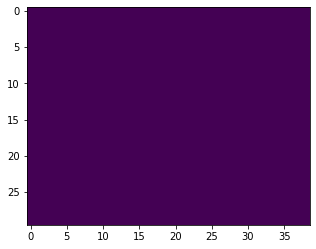

In [31]:
plt.imshow(occupancy_grid)
plt.show()

In [74]:
l1.append(pcd_n)
pc_n = np.array(l)
pcd_n = o3d.geometry.PointCloud()
pcd_n.points = o3d.utility.Vector3dVector(pc_n)
o3d.visualization.draw_geometries(l1)